In [14]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
import numpy as np
import datetime as dt
import os
import re
# import gtfs_kit_scissors

Der Plan:
- Kreise/Gemeinden
- für >= 2 Datensätze
- für jede Shape den Unterschied berechnen
- Wie sind die Unterschiede verteilt?
- überdurchschnittlich hohe Abweichungen hervorheben
    - MAD? STD?

In [125]:
def resultComparison(gdfs):
    comp_df = gdfs[0].loc[:,'KRS':'halte.nv'].merge(gdfs[1][['AGS','halte.ges','halte.nv']], on='AGS', suffixes=('_0','_1'))

    comp_df['diff.ges'] = comp_df['halte.ges_1']-comp_df['halte.ges_0']
    comp_df['diff.nv'] = comp_df['halte.nv_1']-comp_df['halte.nv_0']
    comp_df['diff.ges.per'] = comp_df['diff.ges']/comp_df['halte.ges_0']
    comp_df['diff.ges.per.abs'] = comp_df['diff.ges.per'].abs()
    comp_df['diff.nv.per'] = comp_df['diff.nv']/comp_df['halte.nv_0']
    comp_df['diff.nv.per.abs'] = comp_df['diff.nv.per'].abs()

    med = comp_df['diff.ges.per'].median()
    mad = comp_df['diff.ges.per'].mad()
    print("Median percent difference: ", med)
    print("Median average deviation: ", mad)
    display(comp_df['diff.ges.per'].hist())
    
    
    outliers_df = comp_df[(comp_df['diff.ges.per'] - med).abs() > mad]

    outliers_df_conv = comp_df[comp_df['diff.ges.per'].abs() > 0.25] # mehr als 25% Unterschied

    display(outliers_df.sort_values('diff.ges.per.abs',ascending=False).head(50))
    # display(outliers_df_conv.sort_values('diff.ges.per.abs', ascending=False).head(50))
    
    return (outliers_df.sort_values('diff.ges.per.abs',ascending=False),
            outliers_df_conv.sort_values('diff.ges.per.abs', ascending=False))

## Test dieses Jahr

In [121]:
dates = [20220214, 20220425] # dates of datasets

In [122]:
data_dir = "../../data/processed/"
filenames = [data_dir+p for p in os.listdir(data_dir) for d in dates if re.search("\d_{}_.*KRS".format(d), p)]
if len(filenames) != 2:
    raise ValueError('Too few/many files found, check data dir')

In [123]:
gdfs = [gpd.read_file(filename) for filename in filenames]

Median percent difference:  0.00496976761476286
Median average deviation:  0.10759135698128905


<AxesSubplot:>

,KRS,AGS,EWZ,KFL,SFL,halte.ges_0,halte.fz,halte.fb,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
162,Mainz,7315,218578,97.73,48.18089,11524.008230,58.860082,10.362140,11454.786008,44314.207668,44255.578275,32790.199437,32800.792267,2.845381,2.845381,2.863501,2.863501
212,Waldshut,8337,171003,1131.14,116.50742,5094.259259,0.000000,0.000000,5094.259259,17113.619808,17113.619808,12019.360549,12019.360549,2.359393,2.359393,2.359393,2.359393
225,Altötting,9171,111516,569.29,75.14628,2530.703704,0.000000,0.000000,2530.703704,5445.041534,5445.041534,2914.337830,2914.337830,1.151592,1.151592,1.151592,1.151592
204,Breisgau-Hochschwarzwald,8315,263601,1378.33,146.10298,13641.572016,3.292181,27.930041,13610.349794,25780.284345,25771.460064,12138.712329,12161.110270,0.889832,0.889832,0.893519,0.893519
205,Emmendingen,8316,166408,679.81,76.81853,9059.559671,0.000000,0.000000,9059.559671,15758.495208,15758.495208,6698.935537,6698.935537,0.739433,0.739433,0.739433,0.739433
142,Koblenz,7111,114052,105.25,38.31100,8051.176955,43.843621,6.991770,8000.341564,13764.185304,13720.492013,5713.008349,5720.150449,0.709587,0.709587,0.714988,0.714988
365,Halle (Saale),15002,238762,135.03,71.29584,33311.098765,80.267490,16.024691,33214.806584,11848.150160,11766.207668,-21462.948606,-21448.598917,-0.644318,0.644318,-0.645754,0.645754
148,Mayen-Koblenz,7137,214434,817.69,139.00730,9436.736626,15.790123,0.983539,9419.962963,15514.884984,15499.696486,6078.148359,6079.733523,0.644094,0.644094,0.645409,0.645409
48,Wilhelmshaven,3405,76089,107.07,48.07443,11858.563786,0.000000,0.818930,11857.744856,4258.948882,4258.948882,-7599.614904,-7598.795974,-0.640855,0.640855,-0.640830,0.640830
67,Mönchengladbach,5116,261034,170.47,84.55312,18769.423868,6.477366,5.045267,18757.901235,29248.265176,29240.578275,10478.841307,10482.677040,0.558293,0.558293,0.558841,0.558841


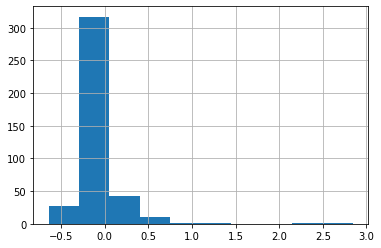

In [126]:
badCities1 = resultComparison(gdfs)

In [133]:
len(badCities1[1])

54

### another comparison...

In [138]:
dates = [20220214, 20220627] # dates of datasets

In [139]:
data_dir = "../../data/processed/"
filenames = [data_dir+p for p in os.listdir(data_dir) for d in dates if re.search("\d_{}_.*KRS".format(d), p)]
if len(filenames) != 2:
    raise ValueError('Too few/many files found, check data dir')

In [140]:
gdfs = [gpd.read_file(filename) for filename in filenames]

Median percent difference:  -0.00014703211664953921
Median average deviation:  0.252936690146345


<AxesSubplot:>

,KRS,AGS,EWZ,KFL,SFL,halte.ges_0,halte.fz,halte.fb,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
85,Heinsberg,5370,255555,627.92,143.16576,1985.539936,3.431310,0.000000,1982.108626,9746.588889,9742.933333,7761.048953,7760.824707,3.908785,3.908785,3.915439,3.915439
103,Paderborn,5774,307839,1246.78,195.74446,12206.258786,10.389776,0.000000,12195.869010,45098.411111,45089.422222,32892.152325,32893.553213,2.694696,2.694696,2.697106,2.697106
48,Wilhelmshaven,3405,76089,107.07,48.07443,4258.948882,0.000000,0.000000,4258.948882,11988.588889,11987.827778,7729.640007,7728.878896,1.814917,1.814917,1.814739,1.814739
365,Halle (Saale),15002,238762,135.03,71.29584,11848.150160,79.284345,2.658147,11766.207668,27883.894444,27785.594444,16035.744285,16019.386777,1.353439,1.353439,1.361474,1.361474
142,Koblenz,7111,114052,105.25,38.31100,13764.185304,42.677316,1.015974,13720.492013,32208.755556,32159.555556,18444.570252,18439.063543,1.340041,1.340041,1.343907,1.343907
148,Mayen-Koblenz,7137,214434,817.69,139.00730,15514.884984,15.188498,0.000000,15499.696486,35909.766667,35893.388889,20394.881683,20393.692403,1.314536,1.314536,1.315748,1.315748
150,Rhein-Hunsrück-Kreis,7140,103163,991.07,118.92840,5800.565495,0.000000,0.000000,5800.565495,13355.861111,13355.861111,7555.295616,7555.295616,1.302510,1.302510,1.302510,1.302510
106,Hagen,5914,188686,160.45,56.31795,26458.038339,67.303514,0.000000,26390.734824,59439.605556,59371.044444,32981.567217,32980.309620,1.246561,1.246561,1.249693,1.249693
143,Ahrweiler,7131,130086,787.04,107.03744,6392.044728,17.025559,0.000000,6375.019169,14262.011111,14245.005556,7869.966383,7869.986386,1.231213,1.231213,1.234504,1.234504
144,Altenkirchen (Westerwald),7132,128805,642.36,101.49288,7209.322684,0.000000,0.000000,7209.322684,16064.994444,16064.994444,8855.671761,8855.671761,1.228364,1.228364,1.228364,1.228364


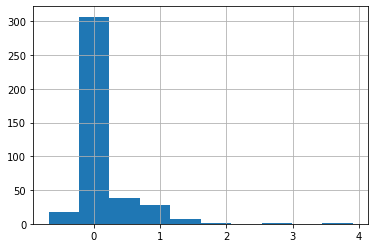

In [141]:
badCities4 = resultComparison(gdfs)

In [142]:
len(badCities4[1])

90

### are there overlaps?

In [143]:
badCities1[0]

,KRS,AGS,EWZ,KFL,SFL,halte.ges_0,halte.fz,halte.fb,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
162,Mainz,7315,218578,97.73,48.18089,11524.008230,58.860082,10.362140,11454.786008,44314.207668,44255.578275,32790.199437,32800.792267,2.845381,2.845381,2.863501,2.863501
212,Waldshut,8337,171003,1131.14,116.50742,5094.259259,0.000000,0.000000,5094.259259,17113.619808,17113.619808,12019.360549,12019.360549,2.359393,2.359393,2.359393,2.359393
225,Altötting,9171,111516,569.29,75.14628,2530.703704,0.000000,0.000000,2530.703704,5445.041534,5445.041534,2914.337830,2914.337830,1.151592,1.151592,1.151592,1.151592
204,Breisgau-Hochschwarzwald,8315,263601,1378.33,146.10298,13641.572016,3.292181,27.930041,13610.349794,25780.284345,25771.460064,12138.712329,12161.110270,0.889832,0.889832,0.893519,0.893519
205,Emmendingen,8316,166408,679.81,76.81853,9059.559671,0.000000,0.000000,9059.559671,15758.495208,15758.495208,6698.935537,6698.935537,0.739433,0.739433,0.739433,0.739433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Weimar,16055,65228,84.48,29.39904,4490.098765,6.012346,3.855967,4480.230453,3975.546326,3967.578275,-514.552440,-512.652178,-0.114597,0.114597,-0.114425,0.114425
95,Steinfurt,5566,448220,1795.77,319.64706,21172.543210,27.781893,2.502058,21142.259259,23572.856230,23545.204473,2400.313020,2402.945214,0.113369,0.113369,0.113656,0.113656
224,Rosenheim,9163,63551,37.22,15.44630,5809.687243,31.176955,1.679012,5776.831276,5176.728435,5144.223642,-632.958808,-632.607634,-0.108949,0.108949,-0.109508,0.109508
380,Jena,16053,111343,114.77,33.28330,8392.082305,17.724280,9.827160,8364.530864,7493.392971,7472.712460,-898.689333,-891.818404,-0.107088,0.107088,-0.106619,0.106619


In [144]:
badCities4[0]

,KRS,AGS,EWZ,KFL,SFL,halte.ges_0,halte.fz,halte.fb,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
85,Heinsberg,5370,255555,627.92,143.16576,1985.539936,3.431310,0.000000,1982.108626,9746.588889,9742.933333,7761.048953,7760.824707,3.908785,3.908785,3.915439,3.915439
103,Paderborn,5774,307839,1246.78,195.74446,12206.258786,10.389776,0.000000,12195.869010,45098.411111,45089.422222,32892.152325,32893.553213,2.694696,2.694696,2.697106,2.697106
48,Wilhelmshaven,3405,76089,107.07,48.07443,4258.948882,0.000000,0.000000,4258.948882,11988.588889,11987.827778,7729.640007,7728.878896,1.814917,1.814917,1.814739,1.814739
365,Halle (Saale),15002,238762,135.03,71.29584,11848.150160,79.284345,2.658147,11766.207668,27883.894444,27785.594444,16035.744285,16019.386777,1.353439,1.353439,1.361474,1.361474
142,Koblenz,7111,114052,105.25,38.31100,13764.185304,42.677316,1.015974,13720.492013,32208.755556,32159.555556,18444.570252,18439.063543,1.340041,1.340041,1.343907,1.343907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Memmingen,9764,44100,70.11,18.22860,4257.242812,14.019169,0.000000,4243.223642,3122.522222,3103.316667,-1134.720589,-1139.906976,-0.266539,0.266539,-0.268642,0.268642
54,Grafschaft Bentheim,3456,137162,981.80,141.37920,7641.616613,26.939297,0.000000,7614.677316,5634.100000,5605.772222,-2007.516613,-2008.905094,-0.262708,0.262708,-0.263820,0.263820
20,Goslar,3153,136292,966.73,105.37357,14856.504792,0.000000,0.000000,14856.504792,18739.955556,18735.572222,3883.450763,3879.067430,0.261397,0.261397,0.261102,0.261102
395,Sonneberg,16072,57717,460.84,43.77980,2087.824281,0.000000,0.000000,2087.824281,2630.438889,2630.438889,542.614608,542.614608,0.259895,0.259895,0.259895,0.259895


In [165]:
badCities1[0]

,KRS,AGS,EWZ,KFL,SFL,halte.ges_0,halte.fz,halte.fb,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
162,Mainz,7315,218578,97.73,48.18089,11524.008230,58.860082,10.362140,11454.786008,44314.207668,44255.578275,32790.199437,32800.792267,2.845381,2.845381,2.863501,2.863501
212,Waldshut,8337,171003,1131.14,116.50742,5094.259259,0.000000,0.000000,5094.259259,17113.619808,17113.619808,12019.360549,12019.360549,2.359393,2.359393,2.359393,2.359393
225,Altötting,9171,111516,569.29,75.14628,2530.703704,0.000000,0.000000,2530.703704,5445.041534,5445.041534,2914.337830,2914.337830,1.151592,1.151592,1.151592,1.151592
204,Breisgau-Hochschwarzwald,8315,263601,1378.33,146.10298,13641.572016,3.292181,27.930041,13610.349794,25780.284345,25771.460064,12138.712329,12161.110270,0.889832,0.889832,0.893519,0.893519
205,Emmendingen,8316,166408,679.81,76.81853,9059.559671,0.000000,0.000000,9059.559671,15758.495208,15758.495208,6698.935537,6698.935537,0.739433,0.739433,0.739433,0.739433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Weimar,16055,65228,84.48,29.39904,4490.098765,6.012346,3.855967,4480.230453,3975.546326,3967.578275,-514.552440,-512.652178,-0.114597,0.114597,-0.114425,0.114425
95,Steinfurt,5566,448220,1795.77,319.64706,21172.543210,27.781893,2.502058,21142.259259,23572.856230,23545.204473,2400.313020,2402.945214,0.113369,0.113369,0.113656,0.113656
224,Rosenheim,9163,63551,37.22,15.44630,5809.687243,31.176955,1.679012,5776.831276,5176.728435,5144.223642,-632.958808,-632.607634,-0.108949,0.108949,-0.109508,0.109508
380,Jena,16053,111343,114.77,33.28330,8392.082305,17.724280,9.827160,8364.530864,7493.392971,7472.712460,-898.689333,-891.818404,-0.107088,0.107088,-0.106619,0.106619


In [168]:
(badCities1[0]).loc[:,['diff.nv','diff.nv.per.abs']]

,diff.nv,diff.nv.per.abs
162,32800.792267,2.863501
212,12019.360549,2.359393
225,2914.337830,1.151592
204,12161.110270,0.893519
205,6698.935537,0.739433
...,...,...
382,-512.652178,0.114425
95,2402.945214,0.113656
224,-632.607634,0.109508
380,-891.818404,0.106619


In [175]:
twice_bad = badCities1[1].loc[:,['KRS','diff.ges','diff.nv','diff.ges.per','diff.ges.per.abs','diff.nv.per','diff.nv.per.abs']
                 ].merge(badCities4[1].loc[:,['KRS','diff.ges','diff.nv','diff.ges.per','diff.ges.per.abs','diff.nv.per','diff.nv.per.abs']],
                         on='KRS',
                         suffixes=('_feb','_jun')
                )

In [176]:
twice_bad[np.sign(twice_bad['diff.ges_feb'])==np.sign(twice_bad['diff.ges_jun'])]

,KRS,diff.ges_feb,diff.nv_feb,diff.ges.per_feb,diff.ges.per.abs_feb,diff.nv.per_feb,diff.nv.per.abs_feb,diff.ges_jun,diff.nv_jun,diff.ges.per_jun,diff.ges.per.abs_jun,diff.nv.per_jun,diff.nv.per.abs_jun
2,Koblenz,5713.008349,5720.150449,0.709587,0.709587,0.714988,0.714988,18444.570252,18439.063543,1.340041,1.340041,1.343907,1.343907
4,Mayen-Koblenz,6078.148359,6079.733523,0.644094,0.644094,0.645409,0.645409,20394.881683,20393.692403,1.314536,1.314536,1.315748,1.315748
6,Mönchengladbach,10478.841307,10482.677040,0.558293,0.558293,0.558841,0.558841,33101.523713,33097.982836,1.131743,1.131743,1.131920,1.131920
7,Rhein-Hunsrück-Kreis,2077.516112,2077.516112,0.558015,0.558015,0.558015,0.558015,7555.295616,7555.295616,1.302510,1.302510,1.302510,1.302510
8,Rhein-Lahn-Kreis,2648.942387,2648.942387,0.549453,0.549453,0.549453,0.549453,8508.733333,8508.733333,1.139054,1.139054,1.139054,1.139054
11,Westerwaldkreis,1458.709502,1462.375748,0.541392,0.541392,0.549572,0.549572,4779.709017,4774.173429,1.150883,1.150883,1.157850,1.157850
13,Cochem-Zell,1583.059178,1583.059178,0.529303,0.529303,0.529303,0.529303,4905.483209,4905.483209,1.072496,1.072496,1.072496,1.072496
25,Tuttlingen,2567.647195,2569.579011,0.426042,0.426042,0.429437,0.429437,8278.314945,8273.729837,0.963222,0.963222,0.967328,0.967328
36,Bielefeld,8396.639372,8402.273656,0.301611,0.301611,0.302844,0.302844,20363.721122,20356.860295,0.561976,0.561976,0.563171,0.563171
38,Höxter,1699.795001,1698.251634,0.281503,0.281503,0.281404,0.281404,6361.478044,6364.025115,0.822100,0.822100,0.822952,0.822952


## Vergleich zu letztem Jahr

### Oktober

In [127]:
filenames = [data_dir+p for p in ['nah-fern-211015_kre.stops.4326.geojson','20220610-150005_20220425_fahrplaene_gesamtdeutschland_gtfs.KRS.geojson']]

In [128]:
gdfs = [gpd.read_file(filename) for filename in filenames]

In [129]:
gdfs[0].insert(0,'KRS',gdfs[0]['Raumeinheit'])
gdfs[0].insert(2,'halte.nv',gdfs[0]['n.nv'])
gdfs[0].insert(2,'halte.ges',gdfs[0]['n.nv']+gdfs[0]['n.fv'])

Median percent difference:  -0.01499238997321428
Median average deviation:  2.193383814944538


<AxesSubplot:>

,KRS,AGS,halte.ges_0,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
135,"Kassel, Stadt",6611,634.865100,516.309859,59743.691358,59604.938272,59108.826258,59088.628412,93.104545,93.104545,114.444122,114.444122
138,Kassel,6633,582.760563,582.760563,41062.786008,41061.399177,40480.025445,40478.638614,69.462534,69.462534,69.460154,69.460154
356,"Dresden, Stadt",14612,3982.700315,3870.394366,181615.851852,181427.312757,177633.151537,177556.918391,44.601184,44.601184,45.875666,45.875666
141,Werra-Meißner-Kreis,6636,695.396202,692.070423,30641.012346,30641.012346,29945.616144,29948.941923,43.062669,43.062669,43.274414,43.274414
357,Bautzen,14625,1862.028169,1862.028169,61131.189300,61120.913580,59269.161131,59258.885411,31.830432,31.830432,31.824913,31.824913
358,Görlitz,14626,1472.197183,1472.197183,29661.000000,29652.814815,28188.802817,28180.617632,19.147437,19.147437,19.141877,19.141877
359,Meißen,14627,2095.972350,2066.380282,41381.522634,41351.847737,39285.550284,39285.467455,18.743353,18.743353,19.011732,19.011732
355,Zwickau,14524,1921.028169,1921.028169,37147.251029,37142.308642,35226.222860,35221.280473,18.337171,18.337171,18.334599,18.334599
351,"Chemnitz, Stadt",14511,3118.056338,3118.056338,59129.905350,59110.057613,56011.849012,55992.001275,17.963707,17.963707,17.957341,17.957341
352,Erzgebirgskreis,14521,1781.183099,1781.183099,33324.946502,33321.687243,31543.763403,31540.504144,17.709445,17.709445,17.707615,17.707615


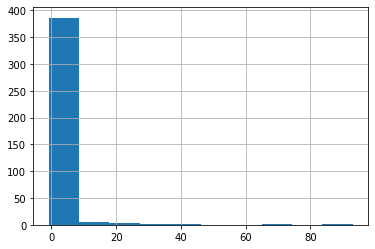

In [130]:
badCities2 = resultComparison(gdfs)

In [131]:
badCities2[1]

,KRS,AGS,halte.ges_0,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
135,"Kassel, Stadt",6611,634.865100,516.309859,59743.691358,59604.938272,59108.826258,59088.628412,93.104545,93.104545,114.444122,114.444122
138,Kassel,6633,582.760563,582.760563,41062.786008,41061.399177,40480.025445,40478.638614,69.462534,69.462534,69.460154,69.460154
356,"Dresden, Stadt",14612,3982.700315,3870.394366,181615.851852,181427.312757,177633.151537,177556.918391,44.601184,44.601184,45.875666,45.875666
141,Werra-Meißner-Kreis,6636,695.396202,692.070423,30641.012346,30641.012346,29945.616144,29948.941923,43.062669,43.062669,43.274414,43.274414
357,Bautzen,14625,1862.028169,1862.028169,61131.189300,61120.913580,59269.161131,59258.885411,31.830432,31.830432,31.824913,31.824913
...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Münster, Stadt",5515,71149.744045,71090.676056,52156.415638,52086.596708,-18993.328407,-19004.079349,-0.266949,0.266949,-0.267322,0.267322
114,Soest,5974,25445.300323,25433.492958,32171.748971,32164.555556,6726.448648,6731.062598,0.264349,0.264349,0.264653,0.264653
349,Vorpommern-Greifswald,13075,15069.246419,15047.507042,19020.242798,18995.399177,3950.996379,3947.892135,0.262189,0.262189,0.262362,0.262362
96,Warendorf,5570,26410.042254,26410.042254,19573.942387,19571.629630,-6836.099867,-6838.412624,-0.258845,0.258845,-0.258932,0.258932


### Anderer Datensatz mit Oktober verglichen

In [134]:
filenames = [data_dir+p for p in ['nah-fern-211015_kre.stops.4326.geojson','20220720-121230_20220214_fahrplaene_gesamtdeutschland_gtfs.KRS.geojson']]

In [135]:
gdfs = [gpd.read_file(filename) for filename in filenames]

In [136]:
gdfs[0].insert(0,'KRS',gdfs[0]['Raumeinheit'])
gdfs[0].insert(2,'halte.nv',gdfs[0]['n.nv'])
gdfs[0].insert(2,'halte.ges',gdfs[0]['n.nv']+gdfs[0]['n.fv'])

Median percent difference:  -0.018391194024960915
Median average deviation:  2.195556999920869


<AxesSubplot:>

,KRS,AGS,halte.ges_0,halte.nv_0,halte.ges_1,halte.nv_1,diff.ges,diff.nv,diff.ges.per,diff.ges.per.abs,diff.nv.per,diff.nv.per.abs
135,"Kassel, Stadt",6611,634.865100,516.309859,59824.798722,59688.680511,59189.933622,59172.370652,93.232300,93.232300,114.606316,114.606316
138,Kassel,6633,582.760563,582.760563,41415.335463,41415.335463,40832.574900,40832.574900,70.067498,70.067498,70.067498,70.067498
356,"Dresden, Stadt",14612,3982.700315,3870.394366,177962.233227,177833.060703,173979.532912,173962.666337,43.683812,43.683812,44.947013,44.947013
141,Werra-Meißner-Kreis,6636,695.396202,692.070423,30781.977636,30781.977636,30086.581434,30089.907213,43.265381,43.265381,43.478100,43.478100
357,Bautzen,14625,1862.028169,1862.028169,60103.792332,60101.000000,58241.764163,58238.971831,31.278670,31.278670,31.277170,31.277170
358,Görlitz,14626,1472.197183,1472.197183,29732.466454,29730.281150,28260.269271,28258.083967,19.195981,19.195981,19.194497,19.194497
359,Meißen,14627,2095.972350,2066.380282,41707.638978,41677.830671,39611.666628,39611.450389,18.898945,18.898945,19.169487,19.169487
351,"Chemnitz, Stadt",14511,3118.056338,3118.056338,61536.143770,61533.322684,58418.087432,58415.266346,18.735418,18.735418,18.734513,18.734513
355,Zwickau,14524,1921.028169,1921.028169,37518.747604,37517.952077,35597.719435,35596.923908,18.530556,18.530556,18.530142,18.530142
352,Erzgebirgskreis,14521,1781.183099,1781.183099,34096.900958,34096.581470,32315.717860,32315.398371,18.142839,18.142839,18.142659,18.142659


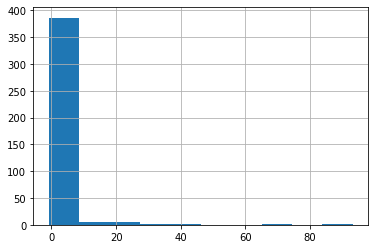

In [137]:
badCities3 = resultComparison(gdfs)